In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

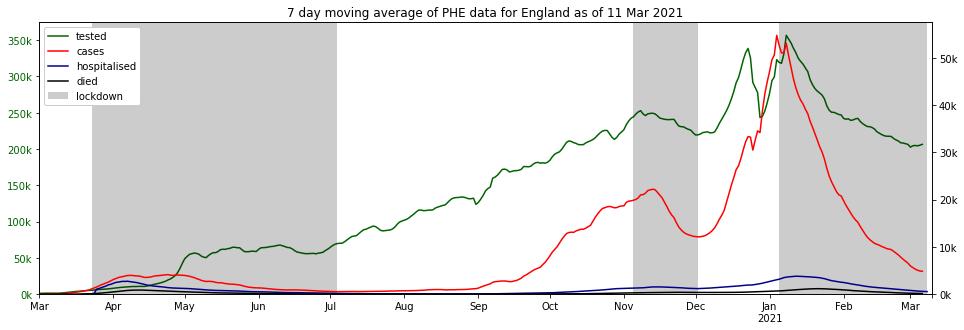

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

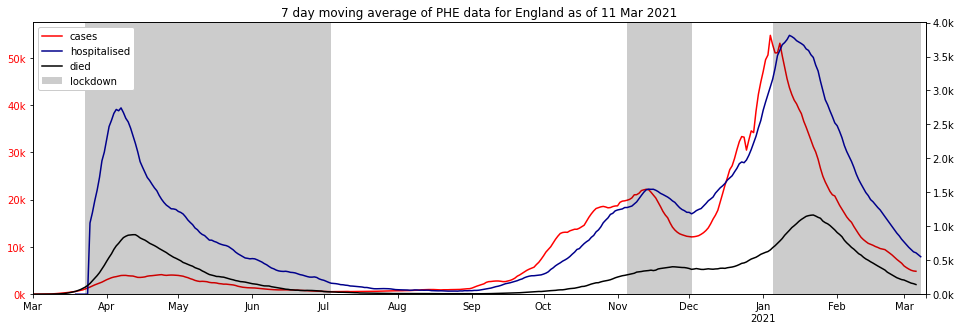

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,939232.0,19587080.0,18647848.0,56286961,1.668649,33.129961,65.201390
1,Northern Ireland,N92000002,48948.0,606695.0,557747.0,1893667,2.584826,29.453278,67.961896
2,Scotland,S92000003,141433.0,1825800.0,1684367.0,5463300,2.588783,30.830579,66.580638
3,Wales,W92000004,221902.0,1034141.0,812239.0,3152879,7.038075,25.761820,67.200105


'partial: 23,053,716 (34.5%), full: 1,351,515'

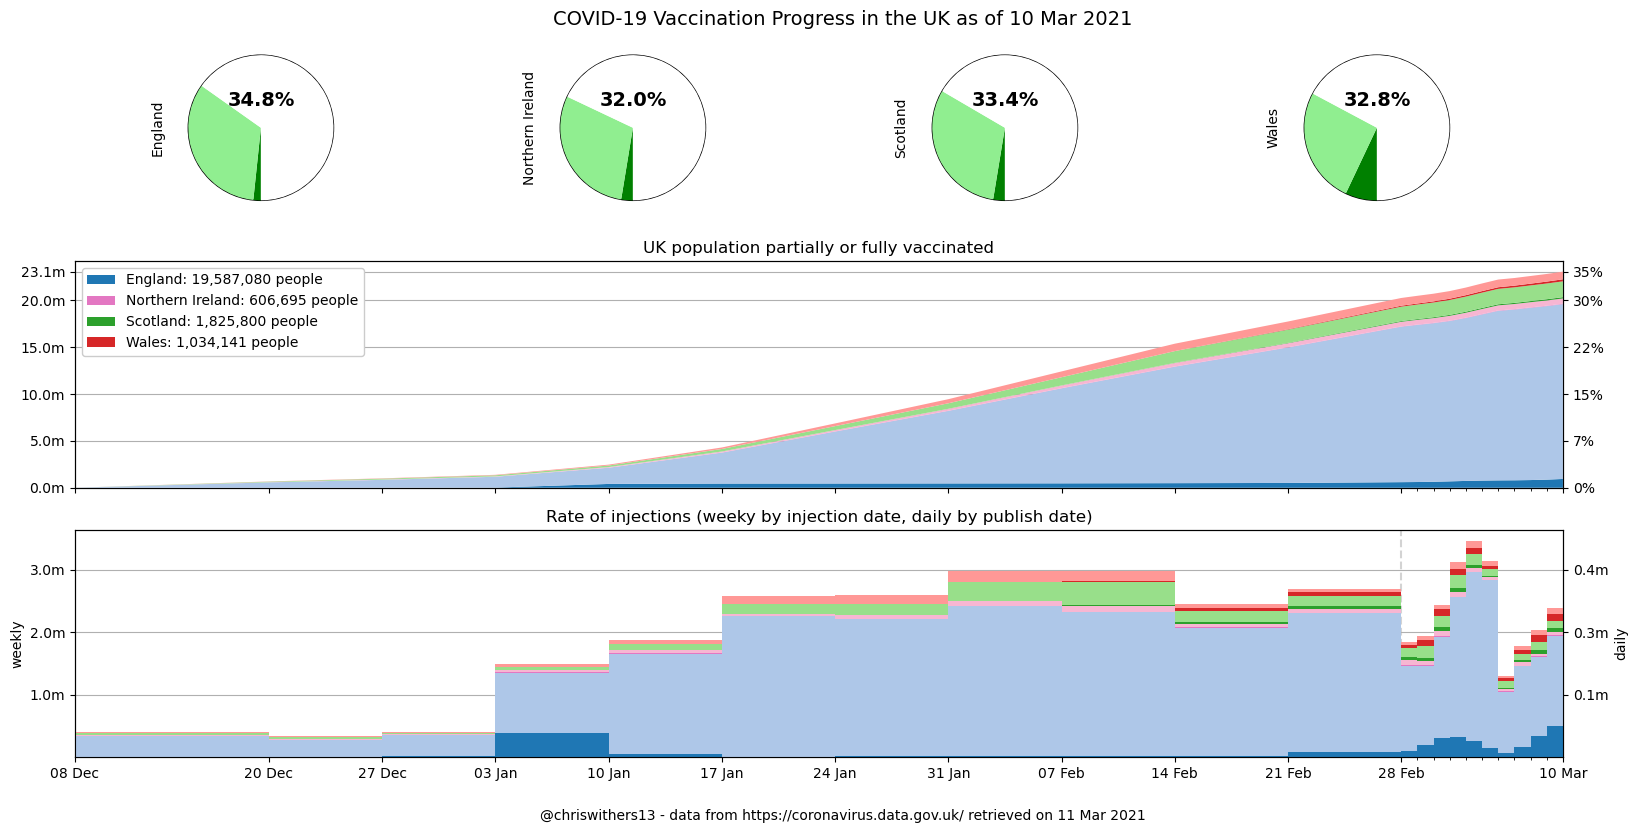

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,10 Mar 21,"+206,720","+70,960","+70,960","+19,587,080","+939,232","+939,232"
Northern Ireland,10 Mar 21,"+5,594","+2,021","+2,021","+606,695","+48,948","+48,948"
Scotland,10 Mar 21,"+16,642","+8,673","+8,673","+1,825,800","+141,433","+141,433"
Wales,10 Mar 21,"+14,931","+15,508","+15,508","+1,034,141","+221,902","+221,902"


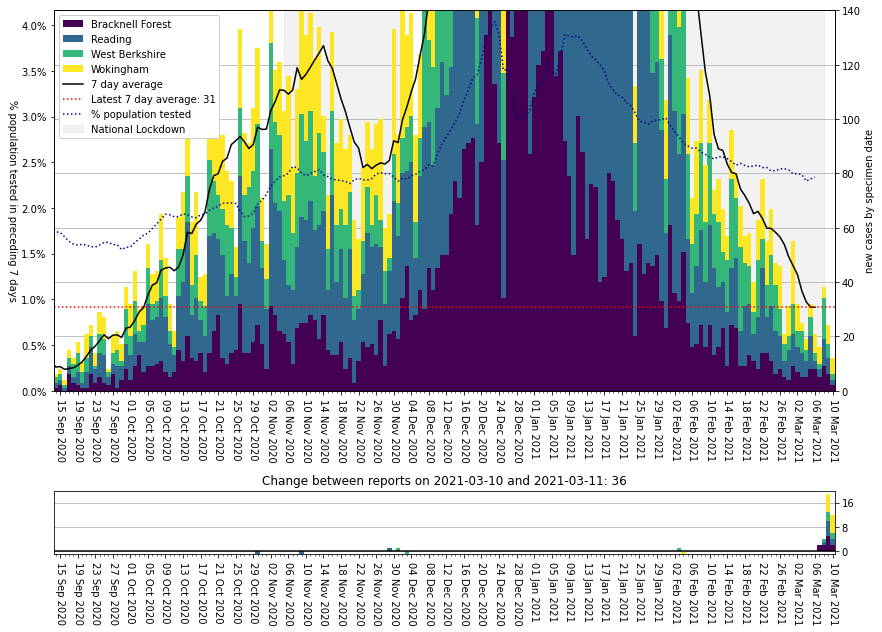

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

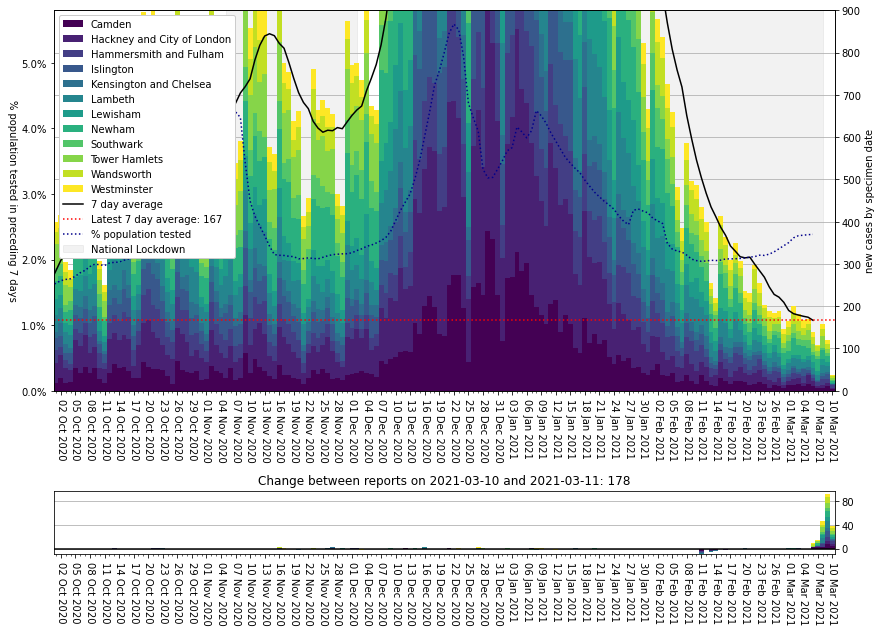

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000035,Derbyshire Dales,163.152437,118.0,2021-03-10
E07000236,Redditch,146.608649,125.0,2021-03-10
E07000150,Corby,135.700241,98.0,2021-03-10
S12000030,Stirling,132.682305,125.0,2021-03-10
E06000010,"Kingston upon Hull, City of",130.880983,340.0,2021-03-10
E08000032,Bradford,125.792922,679.0,2021-03-10
E07000123,Preston,123.659482,177.0,2021-03-10
E08000016,Barnsley,121.523418,300.0,2021-03-10
E07000140,South Holland,116.818742,111.0,2021-03-10


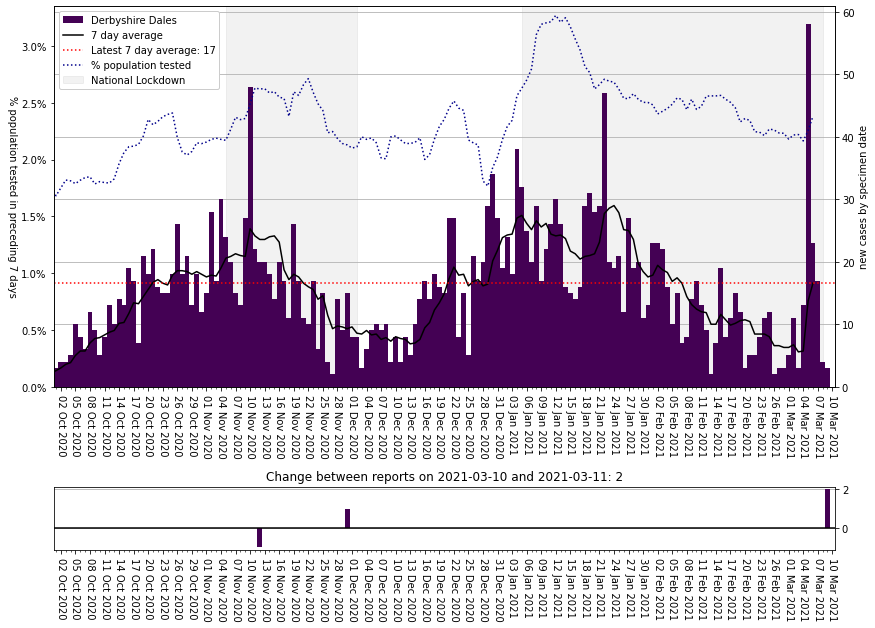

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,71.640264,818.0,2021-03-10
E08000035,Leeds,89.643808,711.0,2021-03-10
S12000049,Glasgow City,107.720495,682.0,2021-03-10
E08000032,Bradford,125.792922,679.0,2021-03-10
E08000003,Manchester,74.702727,413.0,2021-03-10
E08000019,Sheffield,70.274069,411.0,2021-03-10
E08000036,Wakefield,114.265371,398.0,2021-03-10
E08000034,Kirklees,88.451910,389.0,2021-03-10
E06000016,Leicester,101.912914,361.0,2021-03-10


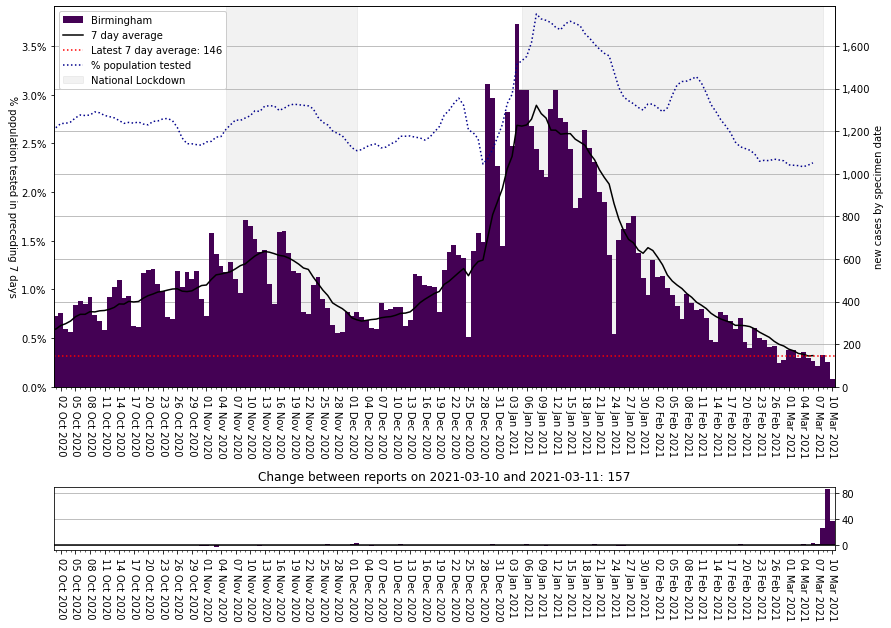

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [18]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.5
phe_max = 0.2

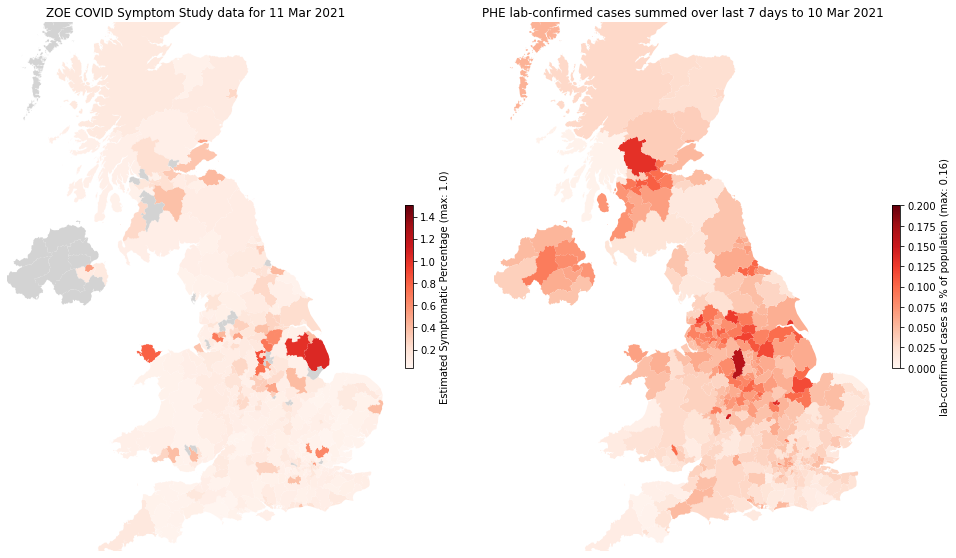

In [19]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [20]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

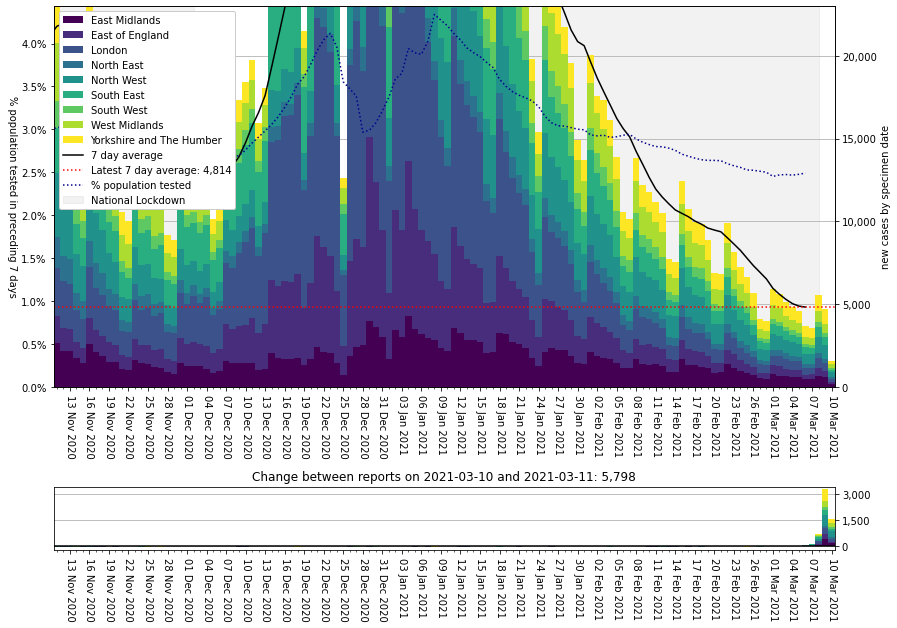

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-11-11')

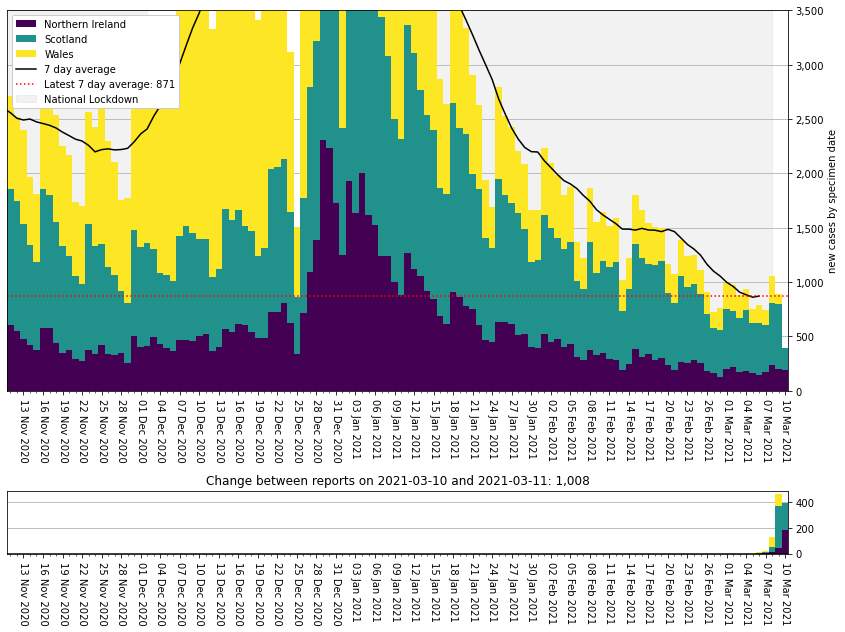

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-11-11')